# Palestine-Israeli Conflict 
### Project number- 21
#### Presented by - Omri Pitchon, Avishem Asayag, Orel Meir.

https://www.kaggle.com/datasets/wilomentena/palestine-israel-conflict-2023-2024-acled

<a id='top'></a>

<div>
<img src="https://github.com/AvishemAsayag/project1/blob/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%AA%20%D7%A1%D7%9B%D7%A1%D7%95%D7%9A%20%D7%99%D7%A9%D7%A8%D7%90%D7%9C%D7%99%20%D7%A4%D7%9C%D7%A1%D7%98%D7%99%D7%A0%D7%99.jpg?raw=true" 
width="555"/>
</div>


# About the Data

##### The data provided focuses on all location and event data collected by the ACLED organization in the Palestine and Israel regions since October 1st until January 2024.


## ACLED website

##### The Armed Conflict Location & Event Data Project (ACLED) collects real-time data on the locations, dates, actors, fatalities, and types of all reported political violence and protest events around the world.
link to the website: https://acleddata.com/

 ### Link for further reading about the conflict

https://en.wikipedia.org/wiki/Timeline_of_the_Israeli%E2%80%93Palestinian_conflict_in_2023#October

#### Explanation of the columns in the data

- **event_id_cnty** - A unique alphanumeric event identifier by number and country acronym. This identifier remains constant even when the event details are updated.
- **event_date** - The date on which the event took place. Recorded as Year-Month- Day.
- **time_precision** - A numeric code between 1 and 3 indicating the level of precision of the date recorded for the event. The higher the number, the lower the precision.
- **disorder_type** - The disorder category an event belongs to.
- **event_type** - The type of event; further specifies the nature of the event.
 - **sub_event_type** - A subcategory of the event type.
 - **actor1** - One of two main actors involved in the event (does not necessarily indicate the aggressor).
 - **assoc_actor_1** - Actor(s) involved in the event alongside ‘Actor 1’ or actor designations that further identify ‘Actor 1’.
 - **inter1** - A numeric code between 0 and 8 indicating the type of ‘Actor 1’ .
- **interaction** - A two-digit numeric code (combination of ‘Inter 1’ and ‘Inter 2’) indicating the two actor types interacting in the event.
- **civilian_targeting** - This column indicates whether the event involved civilian targeting.
 - **iso** - A unique three-digit numeric code assigned to each country or territory according to ISO 3166.
- **region** -The region of the world where the event took place.
- **country** - The country or territory in which the event took place.
- **admin1** - The largest sub-national administrative region in which the event took place.
- **admin2** - The second largest sub-national administrative region in which the event took place.
- **admin3** - The third largest sub-national administrative region in which the event took place.
- **location** - The name of the location at which the event took place.
- **latitude** - The latitude of the location in four decimal degrees notation (EPSG:3857).
- **ongitude** - The longitude of the location in four decimal degrees notation (EPSG:3857).
- **longitude** - The longitude of the location in four decimal degrees notation (EPSG:3857).
- **geo_precision** - A numeric code between 1 and 3 indicating the level of certainty of the location recorded for the event. 
- **source** - The sources used to record the event. Separated by a semicolon.
- **source_scale** -An indication of the geographic closeness of the used sources to the event (for more, see the section Source Scale).
- **notes** - A short description of the event.
- **fatalities** - The number of reported fatalities arising from an event. When there are conflicting reports, the most conservative estimate is recorded.
 - **tags** - Additional structured information about the event, Separated by a semicolon.
 - **timestamp** - An automatically generated Unix timestamp that represents the exact date and time an event was uploaded to the ACLED API.

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




1. [Wrangling data](#section1)

   1.1 [Edit columns](#section1.1)   
   1.2 [Missing values and fix columns](#section1.2)  
  
2. [Observations](#section2)

    2.1 [First Observation](#section2.1) 
    
    2.2 [Second Observation](#section2.2)  
    
    2.3 [Third Observation](#section2.3)


<a id='section1'></a>
## <span style="color:blue"> 1. Wrangling data</span>
[back to top](#top)



In [2]:
url = 'https://raw.githubusercontent.com/AvishemAsayag/project1/main/2023-10-01-2024-01-29-Middle_East-Israel-Palestine.csv'
Isr_plst_conflict_df = pd.read_csv(url)
Isr_plst_conflict_df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,ISR38822,19 January 2024,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Hezbollah,NaN,3,...,Elon,33.0637,35.2201,2,Ynet,National,"On 19 January 2024, Hezbollah forces in Lebano...",0,NaN,1705978255
1,ISR38830,19 January 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Military Forces of Israel (2022-),6,...,Amikam,32.5635,35.0208,1,Israel Hayom,National,"On 19 January 2024, army reservists and relati...",0,crowd size=no report,1705978255
2,ISR38864,19 January 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Students (Israel),6,...,Petah Tikva,32.0871,34.8875,1,Haaretz,National,"On 19 January 2024, dozens of high school stud...",0,crowd size=dozens,1705978256
3,ISR38867,19 January 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Women (Israel),6,...,Tel Aviv,32.0809,34.7806,1,Haaretz,National,"On 19 January 2024, dozens of women and relati...",0,crowd size=dozens,1705978256
4,ISR38868,19 January 2024,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Israel (2022-),NaN,1,...,Haifa,32.8184,34.9885,2,Calcalist; Colbo News; Haaretz; Jerusalem Post...,Subnational-National,"Interception: On 19 January 2024, Israeli mili...",0,NaN,1705978256


### Understanding the data 

 ##### we look at the types of columns and how much NAN types each have to see if we want to change them

In [59]:
Isr_plst_conflict_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18080 entries, 0 to 18089
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   event_id_cnty       18080 non-null  object        
 1   event_date          18080 non-null  datetime64[ns]
 2   time_precision      18080 non-null  int64         
 3   disorder_type       18080 non-null  object        
 4   event_type          18080 non-null  object        
 5   sub_event_type      18080 non-null  object        
 6   actor1              18080 non-null  object        
 7   assoc_actor_1       18080 non-null  object        
 8   inter1              18080 non-null  int64         
 9   interaction         18080 non-null  int64         
 10  civilian_targeting  18080 non-null  object        
 11  iso                 18080 non-null  int64         
 12  country             18080 non-null  object        
 13  admin1              18080 non-null  object    

In [4]:
Isr_plst_conflict_df.shape

(18090, 28)

In [5]:
Isr_plst_conflict_df.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'interaction', 'civilian_targeting', 'iso',
       'region', 'country', 'admin1', 'admin2', 'admin3', 'location',
       'latitude', 'longitude', 'geo_precision', 'source', 'source_scale',
       'notes', 'fatalities', 'tags', 'timestamp'],
      dtype='object')

<a id='section1.1'></a>
### <span style="color:blue"> 1.1 Edit columns</span>

##### We dropped the 'year' column because there is another column in the data that indicates the date of each event.
##### Additionally, we decided to focus on the year 2023, as the data does not provide complete information for events occurring in January 2024.

In [6]:
Isr_plst_conflict_df.drop(columns=['year'], inplace=True)

 ##### We dropped the 'region' column because the conflict concentrates only in the Middle East

In [7]:
Isr_plst_conflict_df.drop(columns=['region'], inplace=True)

 #####  We change the `date` into a `datetime` object and extract the month

In [8]:
Isr_plst_conflict_df['event_date'] = pd.to_datetime(Isr_plst_conflict_df['event_date'])

In [9]:
Isr_plst_conflict_df['month'] = pd.DatetimeIndex(Isr_plst_conflict_df['event_date']).month
Isr_plst_conflict_df['month'] = pd.DatetimeIndex(Isr_plst_conflict_df['event_date']).strftime('%B')

<a id='section1.2'></a>
### <span style="color:blue"> 1.2 Missing values and fix columns</span>
[back to top](#top)


In [10]:
Isr_plst_conflict_df.isnull().sum().sort_values(ascending = False)

assoc_actor_1         15575
admin3                15235
tags                  13894
civilian_targeting    11632
admin2                   10
event_id_cnty             0
timestamp                 0
fatalities                0
notes                     0
source_scale              0
source                    0
geo_precision             0
longitude                 0
latitude                  0
location                  0
admin1                    0
event_date                0
country                   0
iso                       0
interaction               0
inter1                    0
actor1                    0
sub_event_type            0
event_type                0
disorder_type             0
time_precision            0
month                     0
dtype: int64

#### We will examine each column separately

### admin2

##### The second largest sub-national administrative region in which the event took place.

In [11]:
Isr_plst_conflict_df['admin2'].isnull().sum()

10

In [12]:
Isr_plst_conflict_df['admin2'].unique()

array(['Akko', 'Hadera', 'Petah Tiqwa', 'Tel Aviv', 'Haifa', 'Ashqelon',
       'Jerusalem', 'Gaza City', 'Deir El Balah', 'Tulkarm', 'Nablus',
       'Hebron', 'Jenin', 'Khan Yunis', 'North Gaza', 'Rafah',
       'Ramallah and Al Bireh', 'Al Quds', 'Tubas', 'Qalqilya', 'Salfit',
       'Zefat', 'Beer Sheva', 'Jericho', 'Bethlehem', 'Rehovot', 'Ramla',
       'Yizreel', 'Kinneret', 'Sharon', nan], dtype=object)

In [13]:
Isr_plst_conflict_df = Isr_plst_conflict_df.dropna(subset=['admin2'])

##### In this column, there is no need to fill missing values since the number of rows is minimal compared to the entire rows in the data.
##### We have removed them.

### civilian_targeting

##### This column indicates whether the event involved civilian targeting.

In [14]:
Isr_plst_conflict_df['civilian_targeting'].isnull().sum()

11628

In [15]:
Isr_plst_conflict_df['civilian_targeting'].unique()

array([nan, 'Civilian targeting'], dtype=object)

### tags

##### Additional structured information about the event. 

In [16]:
Isr_plst_conflict_df['tags'].isnull().sum()

13884

In [17]:
Isr_plst_conflict_df['tags'].unique()

array([nan, 'crowd size=no report', 'crowd size=dozens',
       'crowd size=about 300', 'crowd size=about 150',
       'crowd size=at least 2,000', 'crowd size=hundreds',
       'crowd size=thousands', 'crowd size=about 120,000',
       'crowd size=at least 1,000', 'crowd size=several dozen',
       'crowd size=about 1,000', 'crowd size=about 100',
       'crowd size=around 10,000', 'crowd size=about 30',
       'crowd size=about 40', 'crowd size=tens', 'crowd size=about 2,000',
       'crowd size=about 20,000', 'crowd size=about 50',
       'crowd size=at least 200', 'crowd size=4', 'crowd size=about 250',
       'crowd size=about 20', 'crowd size=about 400',
       'crowd size=hundred', 'crowd size=about 100,000',
       'crowd size=about 200', 'crowd size=tens of thousands',
       'crowd size=dozens to about 100', 'crowd size= over 20',
       'crowd size=large', 'crowd size=dozens to hundreds',
       'crowd size=over 30', 'crowd size=no report; local administrators',
       'crow

### admin3

##### The third largest sub-national administrative region in which the event took place.

In [18]:
Isr_plst_conflict_df['admin3'].isnull().sum()

15225

In [19]:
Isr_plst_conflict_df['admin3'].unique()

array(['Elon', 'Alexander Mountain', 'Petah Tiqwa', 'Tel Aviv', 'Haifa',
       'Akko', 'Ashqelon', 'Hadera', 'Judean Mountains', nan, 'Yehiam',
       'Eastern Upper Galilee', 'Besor', 'Nahariyya', 'Hula Basin',
       'Gerar', 'Southern Sharon', 'Ashdod', 'Rehovot', 'Rishon LeZiyyon',
       'Ramle', 'Modiin', 'Nazareth-Tiran Mountains', 'Hazor Region',
       'Arava', 'Lakhish', 'Malakhi', 'Kinnerot', 'Western Sharon',
       'Judean Foothills', 'Beer Sheva', 'Yoqneam', 'Yizreel',
       'Bet Shean Basin', 'Northern Negev Mountain', 'Eastern Sharon',
       'Harod Valley', 'Carmel Coast', 'Shefaram', 'Zikhron Yaakov'],
      dtype=object)

### assoc_actor_1

 ##### Actor(s) involved in the event alongside ‘Actor 1’ or actor designations that further identify ‘Actor 1’.

In [20]:
Isr_plst_conflict_df['assoc_actor_1'].isnull().sum()

15565

In [21]:
Isr_plst_conflict_df['assoc_actor_1'].unique()

array([nan, 'Military Forces of Israel (2022-)', 'Students (Israel)',
       'Women (Israel)', 'Rioters (Palestine)',
       'Refugees/IDPs (Palestine)', 'Muslim Group (Palestine)',
       'Hamas Movement', 'Settlers (Israel)',
       'Standing Together; Arab Ethnic Group (Israel); Jewish Group (Israel); Women Wage Peace; Former Government of Israel (2022-); Joint List',
       'Journalists (Palestine)', 'Farmers (Palestine)',
       'Katibat Qalqilya - Quick Response',
       'Bedouin Ethnic Group (Palestine); Farmers (Palestine)',
       'Rioters (Palestine); Refugees/IDPs (Palestine)',
       'PIJ: Palestinian Islamic Jihad',
       'Settlers (Israel); Military Forces of Israel (2022-)',
       'Katibat Tulkarm; Rioters (Palestine)',
       'Health Workers (Palestine); Aid Workers (Palestine); Palestinian Red Crescent Society; Refugees/IDPs (Palestine)',
       'Farmers (Israel)',
       'Refugees/IDPs (Palestine); Mujahideen Brigades',
       'Fishers (Palestine)',
       'DFLP: De

In [22]:
Isr_plst_conflict_df= Isr_plst_conflict_df.fillna("Unknown")

 ##### Building a column that refers to the day of the month and checking which day had the most events

In [60]:
Isr_plst_conflict_df['day_month'] = pd.DatetimeIndex(Isr_plst_conflict_df['event_date']).strftime('%d-%m')
Isr_plst_conflict_df[["day_month",'event_date']].head()

,day_month,event_date
0,19-01,2024-01-19
1,19-01,2024-01-19
2,19-01,2024-01-19
3,19-01,2024-01-19
4,19-01,2024-01-19


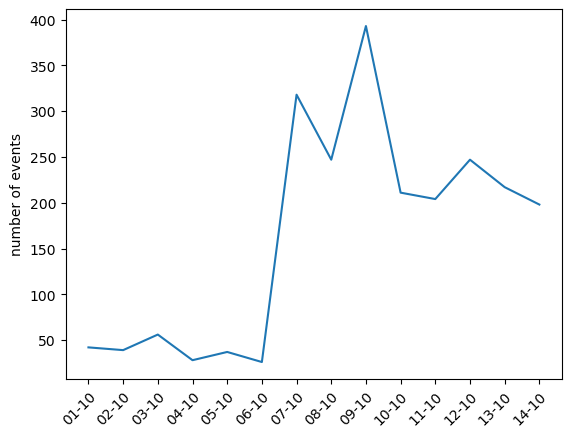

In [61]:
october_data_until_14 = Isr_plst_conflict_df[(Isr_plst_conflict_df['month'] == 'October') & (Isr_plst_conflict_df['event_date'] <= '2023-10-14')]
events_per_day_until_14 = october_data_until_14.groupby('day_month').size().reset_index(name='events_count')
sns.lineplot(data=events_per_day_until_14, x='day_month', y='events_count')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor') 
plt.xlabel("")
plt.ylabel("number of events")
plt.show()

# <span style="color:blue"> 2.1 First Observation</span>

### Before October 7th, there was calm, and because the war broke out on October 7th, it was expected that there would be the most events on that day, which actually does not happen, and instead, the highest concentration of events is a few days after the outbreak of the war.

In [25]:
attacks = Isr_plst_conflict_df[(Isr_plst_conflict_df.actor1 == 'Hamas Movement') |
    (Isr_plst_conflict_df.actor1 == 'Civilians (Palestine)') |
    (Isr_plst_conflict_df.actor1 == 'Protesters (Palestine)') |
    (Isr_plst_conflict_df.actor1 == 'Rioters (Palestine)') |
    (Isr_plst_conflict_df.actor1 == 'PIJ: Palestinian Islamic Jihad') |
    (Isr_plst_conflict_df.actor1 == 'Unidentified Armed Group (Palestine)') |
    (Isr_plst_conflict_df.actor1 == 'Mujahideen Brigades') |
    (Isr_plst_conflict_df.actor1 == 'Al Nasser Salah al Deen Brigades') |
    (Isr_plst_conflict_df.actor1 == 'PFLP: Popular Front for the Liberation of Palestine') |
    (Isr_plst_conflict_df.actor1 == 'Police Forces of Palestine (2007-) Gaza Strip') |
    (Isr_plst_conflict_df.actor1 == 'Government of Palestine (2007-) Hamas Government in Gaza') |
    (Isr_plst_conflict_df.actor1 == 'Government of Palestine (1994-) Palestinian National Authority') |
    (Isr_plst_conflict_df.actor1 == 'Fatah Movement') |
    (Isr_plst_conflict_df.actor1 == 'Military Forces of Palestine (1994-)')|
#Isr_attack = Isr_plst_conflict_df[
    (Isr_plst_conflict_df.actor1 == 'Military Forces of Israel (2022-)') |
    (Isr_plst_conflict_df.actor1 == 'Protesters (Israel)') |
    (Isr_plst_conflict_df.actor1 == 'Police Forces of Israel (2022-)') |
    (Isr_plst_conflict_df.actor1 == 'Rioters (Israel)') |
    (Isr_plst_conflict_df.actor1 == 'Civilians (Israel)') |
    (Isr_plst_conflict_df.actor1 == 'Police Forces of Israel') |
    (Isr_plst_conflict_df.actor1 == 'Settlers (Israel)') |
    (Isr_plst_conflict_df.actor1 == 'Unidentified Armed Group (Israel)') |
    (Isr_plst_conflict_df.actor1 == 'Private Security Forces (Israel)') |
    (Isr_plst_conflict_df.actor1 == 'Military Forces of Israel') |
    (Isr_plst_conflict_df.actor1 == 'Government of Israel (2022-)')|
    (Isr_plst_conflict_df.actor1 == 'Hezbollah') |
    (Isr_plst_conflict_df.actor1 == 'Unidentified Armed Group (Lebanon)') |
    (Isr_plst_conflict_df.actor1 == 'Military Forces of Lebanon (2021-)') |
    (Isr_plst_conflict_df.actor1 == 'Rioters (Lebanon)') ]
attacks

,event_id_cnty,event_date,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,...,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,month,day_month
0,ISR38822,2024-01-19,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Hezbollah,Unknown,3,30,...,35.2201,2,Ynet,National,"On 19 January 2024, Hezbollah forces in Lebano...",0,Unknown,1705978255,January,19-01
1,ISR38830,2024-01-19,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Military Forces of Israel (2022-),6,60,...,35.0208,1,Israel Hayom,National,"On 19 January 2024, army reservists and relati...",0,crowd size=no report,1705978255,January,19-01
2,ISR38864,2024-01-19,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Students (Israel),6,60,...,34.8875,1,Haaretz,National,"On 19 January 2024, dozens of high school stud...",0,crowd size=dozens,1705978256,January,19-01
3,ISR38867,2024-01-19,1,Demonstrations,Protests,Peaceful protest,Protesters (Israel),Women (Israel),6,60,...,34.7806,1,Haaretz,National,"On 19 January 2024, dozens of women and relati...",0,crowd size=dozens,1705978256,January,19-01
4,ISR38868,2024-01-19,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Israel (2022-),Unknown,1,13,...,34.9885,2,Calcalist; Colbo News; Haaretz; Jerusalem Post...,Subnational-National,"Interception: On 19 January 2024, Israeli mili...",0,Unknown,1705978256,January,19-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18085,PSE36552,2023-10-01,1,Political violence,Battles,Armed clash,Military Forces of Israel (2022-),Unknown,8,38,...,35.2167,2,Long War Journal; Quds News Network; Twitter,New media-National,"On 1 October 2023, an unidentified Palestinian...",0,Unknown,1696881789,October,01-10
18086,PSE36553,2023-10-01,1,Political violence,Riots,Mob violence,Rioters (Palestine),Unknown,5,57,...,35.2856,2,Long War Journal; Quds News Network; Twitter,New media-National,"On 1 October 2023, Palestinian rioters threw s...",0,crowd size=no report,1696881789,October,01-10
18087,PSE36553,2023-10-01,1,Political violence,Riots,Mob violence,Civilians (Israel),Settlers (Israel),7,57,...,35.2856,2,Long War Journal; Quds News Network; Twitter,New media-National,"On 1 October 2023, Palestinian rioters threw s...",0,crowd size=no report,1696881789,October,01-10
18088,ISR16135,2023-10-01,1,Political violence,Riots,Mob violence,Rioters (Lebanon),Unknown,5,15,...,35.5795,2,Arutz Sheva; Ma'ariv; Ynet,National,"On 1 October 2023, Lebanese rioters threw ston...",0,crowd size=no report,1706035442,October,01-10


In [145]:
attacks['actor1'] = attacks['actor1'].replace(['Hamas Movement',
                                               'Civilians (Palestine)',
                                               'Protesters (Palestine)',
                                               'Rioters (Palestine)',
                                               'PIJ: Palestinian Islamic Jihad',
                                               'Unidentified Armed Group (Palestine)',
                                               'Mujahideen Brigades',
                                               'Al Nasser Salah al Deen Brigades',
                                               'PFLP: Popular Front for the Liberation of Palestine',
                                               'Police Forces of Palestine (2007-) Gaza Strip',
                                               'Government of Palestine (2007-) Hamas Government in Gaza',
                                               'Government of Palestine (1994-) Palestinian National Authority',
                                               'Fatah Movement',
                                               'Military Forces of Palestine (1994-)'],
                                               'Gaza')
attacks['actor1']= attacks['actor1'].replace(['Military Forces of Israel (2022-)',
                                              'Protesters (Israel)',
                                              'Police Forces of Israel (2022-)',
                                              'Rioters (Israel)',
                                              'Civilians (Israel)',
                                              'Police Forces of Israel',
                                              'Settlers (Israel)',
                                              'Unidentified Armed Group (Israel)',
                                              'Private Security Forces (Israel)',
                                              'Military Forces of Israel',
                                              'Government of Israel (2022-)'],
                                              'Israel')
attacks['actor1']= attacks['actor1'].replace(['Hezbollah',
                                              'Unidentified Armed Group (Lebanon)',
                                              'Military Forces of Lebanon (2021-)',
                                              'Rioters (Lebanon)'],
                                              'Lebanon')

attacks

C:\Users\USER\AppData\Local\Temp\ipykernel_12340\2387080541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attacks['actor1'] = attacks['actor1'].replace(['Hamas Movement',
C:\Users\USER\AppData\Local\Temp\ipykernel_12340\2387080541.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attacks['actor1']= attacks['actor1'].replace(['Military Forces of Israel (2022-)',
C:\Users\USER\AppData\Local\Temp\ipykernel_12340\2387080541.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,event_id_cnty,event_date,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,...,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,month,day_month
0,ISR38822,2024-01-19,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Lebanon,Unknown,3,30,...,35.2201,2,Ynet,National,"On 19 January 2024, Hezbollah forces in Lebano...",0,Unknown,1705978255,January,19-01
1,ISR38830,2024-01-19,1,Demonstrations,Protests,Peaceful protest,Israel,Military Forces of Israel (2022-),6,60,...,35.0208,1,Israel Hayom,National,"On 19 January 2024, army reservists and relati...",0,crowd size=no report,1705978255,January,19-01
2,ISR38864,2024-01-19,1,Demonstrations,Protests,Peaceful protest,Israel,Students (Israel),6,60,...,34.8875,1,Haaretz,National,"On 19 January 2024, dozens of high school stud...",0,crowd size=dozens,1705978256,January,19-01
3,ISR38867,2024-01-19,1,Demonstrations,Protests,Peaceful protest,Israel,Women (Israel),6,60,...,34.7806,1,Haaretz,National,"On 19 January 2024, dozens of women and relati...",0,crowd size=dozens,1705978256,January,19-01
4,ISR38868,2024-01-19,1,Strategic developments,Strategic developments,Disrupted weapons use,Israel,Unknown,1,13,...,34.9885,2,Calcalist; Colbo News; Haaretz; Jerusalem Post...,Subnational-National,"Interception: On 19 January 2024, Israeli mili...",0,Unknown,1705978256,January,19-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18085,PSE36552,2023-10-01,1,Political violence,Battles,Armed clash,Israel,Unknown,8,38,...,35.2167,2,Long War Journal; Quds News Network; Twitter,New media-National,"On 1 October 2023, an unidentified Palestinian...",0,Unknown,1696881789,October,01-10
18086,PSE36553,2023-10-01,1,Political violence,Riots,Mob violence,Gaza,Unknown,5,57,...,35.2856,2,Long War Journal; Quds News Network; Twitter,New media-National,"On 1 October 2023, Palestinian rioters threw s...",0,crowd size=no report,1696881789,October,01-10
18087,PSE36553,2023-10-01,1,Political violence,Riots,Mob violence,Israel,Settlers (Israel),7,57,...,35.2856,2,Long War Journal; Quds News Network; Twitter,New media-National,"On 1 October 2023, Palestinian rioters threw s...",0,crowd size=no report,1696881789,October,01-10
18088,ISR16135,2023-10-01,1,Political violence,Riots,Mob violence,Lebanon,Unknown,5,15,...,35.5795,2,Arutz Sheva; Ma'ariv; Ynet,National,"On 1 October 2023, Lebanese rioters threw ston...",0,crowd size=no report,1706035442,October,01-10


In [62]:
attacks['actor1'].unique()

array(['Lebanon', 'Israel', 'Gaza'], dtype=object)

In [75]:
attacks1 = attacks[(attacks['month'] == 'October') & (attacks['event_date'] >= '2023-10-06') & (attacks['event_date'] <= '2023-10-10')]

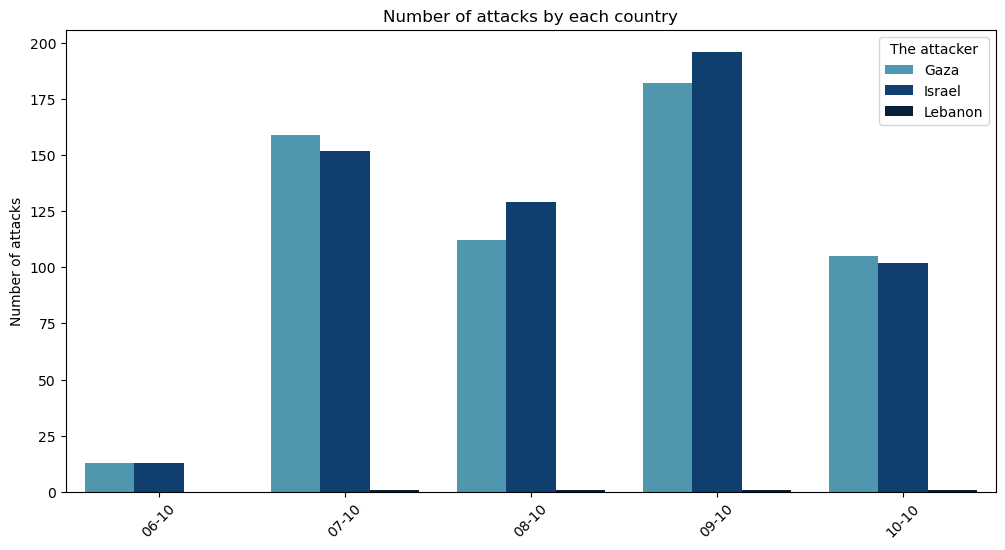

In [105]:
plt.figure(figsize=(12, 6))
sns.countplot(data=attacks1, x='day_month', hue='actor1', palette='ocean_r', order=sorted(attacks1['day_month'].unique()))
plt.title('Number of attacks by each country')
plt.ylabel('Number of attacks')
plt.xticks(rotation=45) 
plt.legend(title='The attacker')
plt.xlabel("")
plt.show()

### The maximum number of attacks occurred on 9/10, confirming it is the day with the most attacks. Now that we know they came from Israel, we can assume that this is the Israeli response to the outbreak of the war.


# <span style="color:blue"> 2.2 Second Observation</span>

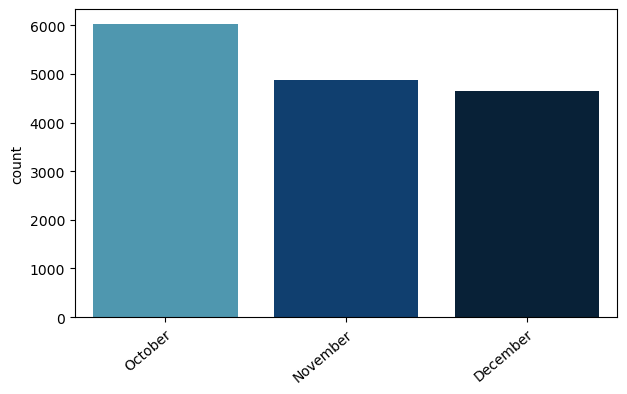

In [150]:
months_without_jan = Isr_plst_conflict_df['month'].value_counts().drop(index='January').sort_values(ascending=False).index
fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(data=Isr_plst_conflict_df, x='month', palette='ocean_r', order=months_without_jan)
plt.xlabel("")
plt.xticks(rotation=40, ha='right', rotation_mode='anchor')
plt.show()

### We wanted to see if the number of events decreases from month to month to assess the state of the conflict. We did notice that the number of events does decrease from October to November. However, we know that the war is not over yet (there are still captives, etc.) So, we wanted to investigate what causes this change.
### Therefore, we will focus on the number of events occurring in November.

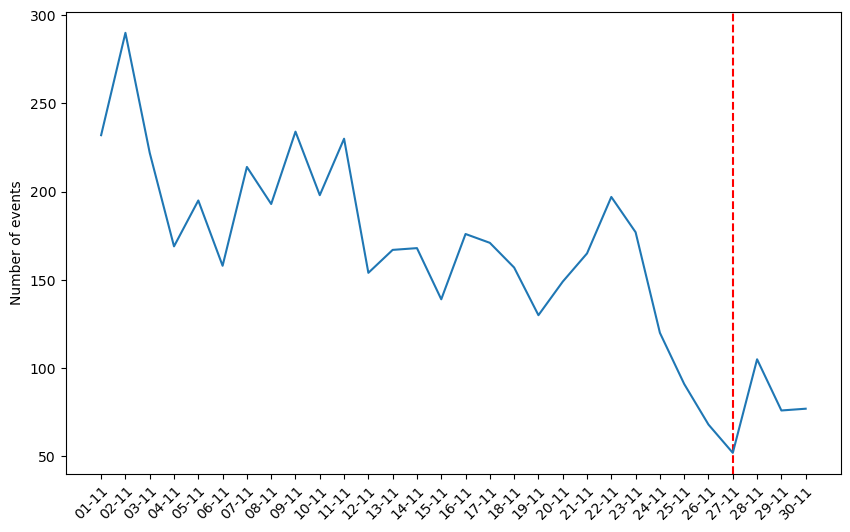

In [108]:
fig, ax = plt.subplots(figsize=(10, 6))
November_data = Isr_plst_conflict_df[(Isr_plst_conflict_df['month'] == 'November') & (Isr_plst_conflict_df['event_date'] <= '2023-11-30')]
November_events = November_data.groupby('day_month').size().reset_index(name='events_count')
plt.axvline(x=November_events['day_month'][November_events['day_month'] == '27-11'].index[0], color='r', linestyle='--')
sns.lineplot(data=November_events, x='day_month', y='events_count')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.xlabel("")
plt.ylabel("Number of events")
plt.show()

### We can see that there is a drastic decrease in the number of events from November 22nd to November 27th.
### This decrease apparently reduces the number of events from October to November and we want to investigate the cause of this drastic drop, considering we are still in a state of war.


In [32]:
data_Nov = Isr_plst_conflict_df[(Isr_plst_conflict_df['month'] == 'November') & (Isr_plst_conflict_df['event_date'] <= '2023-11-27') & (Isr_plst_conflict_df['event_date'] >= '2023-11-24')]
#data_Nov['notes'].unique()

In [33]:
data_Nov=Isr_plst_conflict_df[Isr_plst_conflict_df.notes== 'Other: On 27 November 2023, Hamas released 11 Israeli hostages and six Thai nationals who were being held in Gaza, per the temporary ceasefire agreement agreed upon by Hamas and Israel. The Israelis released were nine children and two women, all of whom were taken hostage from the southern town of Nir Oz. Among the 11 released Israeli hostages are French, German, and Argentinian dual nationals. This was the final exchange of the four-day ceasefire, as originally agreed upon by the two sides. An agreement was later reached on a two-day extension of the ceasefire and hostage exchange. Coded at Gaza.']
data_Nov

,event_id_cnty,event_date,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,...,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,month,day_month
7446,PSE42021,2023-11-27,1,Strategic developments,Strategic developments,Other,Hamas Movement,Unknown,3,37,...,34.4743,3,Haaretz; N12; Times of Israel,Regional,"Other: On 27 November 2023, Hamas released 11 ...",0,Unknown,1701732587,November,27-11
7447,PSE42021,2023-11-27,1,Strategic developments,Strategic developments,Other,Civilians (Israel),Civilians (Thailand),7,37,...,34.4743,3,Haaretz; N12; Times of Israel,Regional,"Other: On 27 November 2023, Hamas released 11 ...",0,Unknown,1701732587,November,27-11



### We checked using the 'notes' column in our dataset (which describes what happened each day), and we found that on November 24th- 27th, there was a ceasefire, and Hamas released captives. Therefore, we can assume that this is why the number of events decreased.

**Link to this event**  
https://he.wikipedia.org/wiki/%D7%A2%D7%A1%D7%A7%D7%AA_%D7%A9%D7%97%D7%A8%D7%95%D7%A8_%D7%94%D7%97%D7%98%D7%95%D7%A4%D7%99%D7%9D_%D7%99%D7%A9%D7%A8%D7%90%D7%9C%E2%80%93%D7%97%D7%9E%D7%90%D7%A1_(2023)


# <span style="color:blue"> 2.3 Third Observation</span>

#### We want to check who attacks the most and which types of attacks they carry out the most

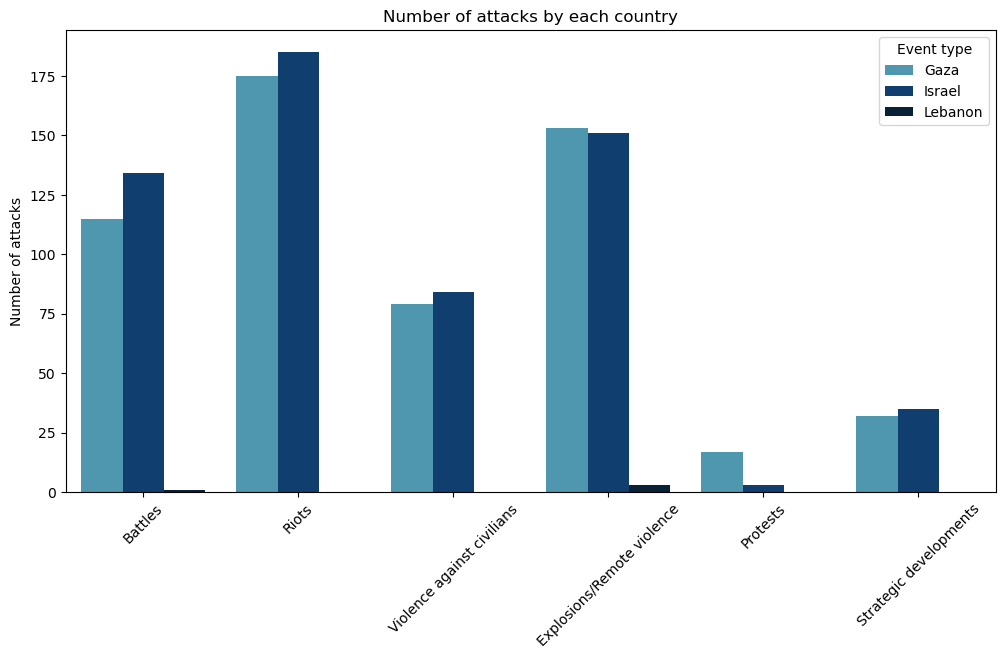

In [158]:
plt.figure(figsize=(12, 6))
sns.countplot(data=attacks1, x='event_type', hue='actor1', palette='ocean_r')
plt.title('Number of attacks by each country')
plt.ylabel('Number of attacks')
plt.xticks(rotation=45) 
plt.legend(title='Event type', loc='upper right', bbox_to_anchor=(1, 1))
plt.xlabel("")
plt.show()

#### We will focus on Israel and Gaza because we can see from the graph that Lebanon is almost negligible.

#### We can see that the most common event types is explosions/Remote violence and riots.
#### We will focus on attacks against Israel.
#### We want to examine the number of fatalities in each attack and focus on the type of events to see what influences the fatalities in Israel.

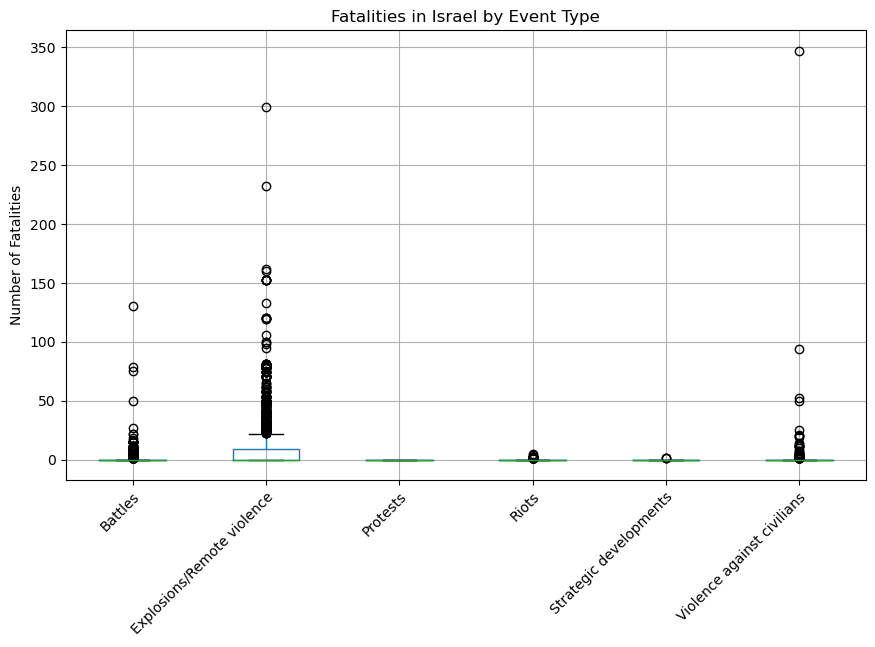

In [171]:
Isr_df=attacks[(attacks['actor1'] == 'Gaza') &(attacks['fatalities'] != 471)]
Isr_df.boxplot( column='fatalities', by='event_type', figsize=(10,6))
plt.title('Fatalities in Israel by Event Type')
plt.suptitle('')
plt.xlabel('')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

### We see a box plot graph. It can be seen that the average number of fatalities in bombings  attacks is the highest. From this, we can conclude that to reduce the number of fatalities,  we need to investment in the use and development of tools against bombings (like Iron Dome).
### We also recomend providing clearer instructions to civilians during a red alert.

In [53]:
a= Isr_plst_conflict_df[Isr_plst_conflict_df.fatalities == 471]
a['notes'].unique()

array(['On 17 October 2023, around 19:00, an unidentified object caused a blast at the Al-Ahli Baptist Hospital in Gaza - Az Zaytun (Gaza City, Gaza Strip), killing at least between 100-471 people according to multiple sources, including the US Intelligence agency (100-300) and Gaza Ministry of Health (471). The Director of the hospital noted that he believed the number was closer to 250. The Gaza Ministry of Health also noted that 314 people were injured. The blast also caused material damages to the church of Saint Porphyrius. Early reports suggested that the blast was due to an Israeli airstrike. The Israeli Defense Forces denied attacking the hospital and claimed that the blast resulted from a failed rocket launch by the Islamic Jihad organization. Islamic Jihad has also denied responsibility for the blast. Actor 1 coded as Unidentified Armed Group until evidence is reviewed. [Palestinian Ministry of Health reported 471 fatalities.]'],
      dtype=object)

#### We removed the outlier point because it is an unusual event during the conflict. We cross-referenced the data with a column in our dataset describing the event on the day with the maximum number of fatalities, and we found that on that day  was the bombing at the hospital in Gaza and were killed Palestinian civilians.